#Results

In [37]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [38]:
# Import delle librerie necessarie
import pandas as pd
import os
import numpy as np
import ast
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, jaccard_score, hamming_loss, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import ast
from scipy.stats import friedmanchisquare

In [39]:
path = "/content/drive/MyDrive/Colab Notebooks/code smells tesi/projects"
projects = []
code_smells = ['CDSBP', 'CC', 'LC', 'LZC', 'RB', 'SC']
# Itera su tutti i file e le cartelle nella cartella specificata
for item in os.listdir(path):
    # Se l'elemento nella cartella è una cartella, aggiungi il nome alla lista
    if os.path.isdir(os.path.join(path, item)):
       projects.append(item)
    # Stampa la lista di nomi dei progetti
print(projects)

['ant-ivy-2.0.0-alpha2', 'ant-rel-1.8.3', 'cassandra-cassandra-1.0.0', 'elasticsearch-v0.19.0', 'hadoop-release-0.6.0', 'hive-release-0.9.0', 'hsqldb-2.2.8', 'karaf-karaf-2.3.0', 'lucene-releases-lucene-solr-3.6.0', 'manifold-cf-release-0.6', 'nutch-release-1.4', 'pig-release-0.8.0', 'qpid-0.14', 'struts-STRUTS_2_3_4', 'xerces2-j-Xerces-J_2_3_0']


In [40]:
df_RF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code smells tesi/Code_Smells_NLP-Finale/results/RF_results.csv")
df_W2V = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code smells tesi/Code_Smells_NLP-Finale/results/RF_W2V_results.csv")
df_CB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code smells tesi/Code_Smells_NLP-Finale/results/CB_results.csv")

In [41]:
df_RF

,Project_name,Smell,Y_pred,Y_test,precision,accuracy,recall,f1,mcc
0,ant-ivy-2.0.0-alpha2,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
1,ant-ivy-2.0.0-alpha2,SC,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
2,ant-rel-1.8.3,CDSBP,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.966667,0.994186,0.996835,0.981171,0.963030
3,ant-rel-1.8.3,CC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.986607,0.973837,0.735294,0.813213,0.676745
4,ant-rel-1.8.3,LC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.687894,0.918605,0.566188,0.589639,0.223036
5,ant-rel-1.8.3,RB,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...",0.974905,0.988372,0.974905,0.974905,0.949810
6,ant-rel-1.8.3,SC,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",0.891717,0.892442,0.898795,0.891871,0.790481
7,cassandra-cassandra-1.0.0,CDSBP,"[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...",0.960813,0.974684,0.960813,0.960813,0.921627
8,cassandra-cassandra-1.0.0,LC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.826754,0.974684,0.826754,0.826754,0.653509
9,cassandra-cassandra-1.0.0,LZC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.481013,0.962025,0.500000,0.490323,0.000000


In [42]:
df_W2V

,Project_name,Smell,Y_pred,Y_test,precision,accuracy,recall,f1,mcc
0,ant-ivy-2.0.0-alpha2,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
1,ant-ivy-2.0.0-alpha2,SC,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
2,ant-rel-1.8.3,CDSBP,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
3,ant-rel-1.8.3,CC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.986607,0.973837,0.735294,0.813213,0.676745
4,ant-rel-1.8.3,LC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.723765,0.921512,0.669412,0.691705,0.389403
5,ant-rel-1.8.3,RB,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...",0.996667,0.994186,0.978261,0.987217,0.974754
6,ant-rel-1.8.3,SC,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",0.889159,0.889535,0.896231,0.888995,0.785359
7,cassandra-cassandra-1.0.0,CDSBP,"[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...",0.908470,0.949367,0.944940,0.925047,0.852631
8,cassandra-cassandra-1.0.0,LC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.826754,0.974684,0.826754,0.826754,0.653509
9,cassandra-cassandra-1.0.0,LZC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.481013,0.962025,0.500000,0.490323,0.000000


In [43]:
df_CB

,Project_name,Smell,Y_pred,Y_test,precision,accuracy,recall,f1,mcc
0,ant-ivy-2.0.0-alpha2,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.470588,0.941176,0.500000,0.484848,0.000000
1,ant-ivy-2.0.0-alpha2,SC,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",0.915058,0.941176,0.935223,0.924444,0.850041
2,ant-rel-1.8.3,CDSBP,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
3,ant-rel-1.8.3,CC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.475291,0.950581,0.500000,0.487332,0.000000
4,ant-rel-1.8.3,LC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.678677,0.918605,0.549246,0.566829,0.187608
5,ant-rel-1.8.3,RB,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...",0.986928,0.976744,0.913043,0.945758,0.896934
6,ant-rel-1.8.3,SC,"[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",0.880833,0.883721,0.883979,0.882127,0.764805
7,cassandra-cassandra-1.0.0,CDSBP,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...",0.909091,0.822785,0.562500,0.561111,0.319801
8,cassandra-cassandra-1.0.0,LC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.481013,0.962025,0.500000,0.490323,0.000000
9,cassandra-cassandra-1.0.0,LZC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.481013,0.962025,0.500000,0.490323,0.000000


In [44]:
code_smells = ['CDSBP', 'CC', 'LC', 'LZC', 'RB', 'SC']
mcnemar_results = []

# Loop attraverso i progetti
for project in projects:
    print(project)
    # Caricamento dei dati specifici del progetto
    df_rf = df_RF[df_RF['Project_name'] == project]
    df_w2v = df_W2V[df_W2V['Project_name'] == project]
    df_cb = df_CB[df_CB['Project_name'] == project]
    if len(df_w2v) == 0 or len(df_cb) == 0 or len(df_rf) == 0:
        continue
    # Loop attraverso i code smell
    for smell in code_smells:
        df_rf2 = df_rf[df_rf['Smell'] == smell]
        df_w2v2 = df_w2v[df_w2v['Smell'] == smell]
        df_cb2 = df_cb[df_cb['Smell'] == smell]

        if df_rf2.empty or df_w2v2.empty or df_cb2.empty:
            continue

        # Estrai l'oggetto come stringa dalla colonna 'Y_pred'
        rf_predictions_str = df_rf2['Y_pred'].iloc[0]
        w2v_predictions_str = df_w2v2['Y_pred'].iloc[0]
        cb_predictions_str = df_cb2['Y_pred'].iloc[0]

        # Trasformazione delle stringhe in liste di valori numerici
        rf_predictions = ast.literal_eval(rf_predictions_str)
        w2v_predictions = ast.literal_eval(w2v_predictions_str)
        cb_predictions = ast.literal_eval(cb_predictions_str)

        # Applica il test di Friedman per il progetto corrente e gli smell correnti
        predictions_list = [rf_predictions, w2v_predictions, cb_predictions]
        predictions_array = np.array(predictions_list)
        _, p_value = friedmanchisquare(*predictions_array.T)

        # Stampa il p-value del test di Friedman per il progetto corrente e l'odore corrente
        print("Friedman test p-value for", project, smell, ":", p_value)

        if p_value < 0.05:  # Significativa differenza tra i modelli
            # Applica il test di McNemar a due a due
            table_rf_w2v = np.array([[np.sum(np.logical_and(rf_predictions, w2v_predictions)), np.sum(np.logical_and(rf_predictions, np.logical_not(w2v_predictions)))],
                                     [np.sum(np.logical_and(np.logical_not(rf_predictions), w2v_predictions)), np.sum(np.logical_and(np.logical_not(rf_predictions), np.logical_not(w2v_predictions)))]])
            table_rf_cb = np.array([[np.sum(np.logical_and(rf_predictions, cb_predictions)), np.sum(np.logical_and(rf_predictions, np.logical_not(cb_predictions)))],
                        [np.sum(np.logical_and(np.logical_not(rf_predictions), cb_predictions)), np.sum(np.logical_and(np.logical_not(rf_predictions), np.logical_not(cb_predictions)))]])
            table_w2v_cb = np.array([[np.sum(np.logical_and(w2v_predictions, cb_predictions)), np.sum(np.logical_and(w2v_predictions, np.logical_not(cb_predictions)))],
                         [np.sum(np.logical_and(np.logical_not(w2v_predictions), cb_predictions)), np.sum(np.logical_and(np.logical_not(w2v_predictions), np.logical_not(cb_predictions)))]])

            result_rf_w2v = mcnemar(table_rf_w2v)
            result_rf_cb = mcnemar(table_rf_cb)
            result_w2v_cb = mcnemar(table_w2v_cb)

            # Correzione di Bonferroni
            p_value_rf_w2v_corrected = result_rf_w2v.pvalue * len(code_smells)
            p_value_rf_cb_corrected = result_rf_cb.pvalue * len(code_smells)
            p_value_w2v_cb_corrected = result_w2v_cb.pvalue * len(code_smells)

            # Salva i risultati del test di McNemar nell'array
            mcnemar_results.append((project, smell, p_value_rf_w2v_corrected, p_value_rf_cb_corrected, p_value_w2v_cb_corrected))

        if (rf_predictions == w2v_predictions and rf_predictions == cb_predictions and w2v_predictions == cb_predictions):
            print("MCC", df_rf2['mcc'])
            print("MCC", df_w2v2['mcc'])
            print("MCC", df_cb2['mcc'])
            print("------------------------------------------------------------------------------")


ant-ivy-2.0.0-alpha2
Friedman test p-value for ant-ivy-2.0.0-alpha2 CDSBP : 3.4549313829847117e-05
Friedman test p-value for ant-ivy-2.0.0-alpha2 SC : 1.9062025960727993e-10
ant-rel-1.8.3
Friedman test p-value for ant-rel-1.8.3 CDSBP : 3.543050354328485e-67
Friedman test p-value for ant-rel-1.8.3 CC : 4.204901599954415e-25
Friedman test p-value for ant-rel-1.8.3 LC : 6.777331306254843e-36
Friedman test p-value for ant-rel-1.8.3 RB : 8.900640136271089e-63
Friedman test p-value for ant-rel-1.8.3 SC : 5.973447333219467e-56
cassandra-cassandra-1.0.0
Friedman test p-value for cassandra-cassandra-1.0.0 CDSBP : 2.941897437263146e-07
Friedman test p-value for cassandra-cassandra-1.0.0 LC : 3.8616995896624603e-07
Friedman test p-value for cassandra-cassandra-1.0.0 LZC : nan
MCC 9    0.0
Name: mcc, dtype: float64
MCC 9    0.0
Name: mcc, dtype: float64
MCC 9    0.0
Name: mcc, dtype: float64
------------------------------------------------------------------------------
Friedman test p-value for ca

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8696: RuntimeWarning: invalid value encountered in double_scalars
  chisq = (12.0 / (k*n*(k+1)) * ssbn - 3*n*(k+1)) / c



Friedman test p-value for hadoop-release-0.6.0 CC : 0.00041416836551202394
Friedman test p-value for hadoop-release-0.6.0 LZC : 2.125744474729808e-05
Friedman test p-value for hadoop-release-0.6.0 SC : 7.736368372140218e-07
hive-release-0.9.0
hsqldb-2.2.8
Friedman test p-value for hsqldb-2.2.8 CDSBP : 2.9293842719928763e-50
Friedman test p-value for hsqldb-2.2.8 CC : 0.4883809327165236
Friedman test p-value for hsqldb-2.2.8 LC : 3.6157213511141524e-42
Friedman test p-value for hsqldb-2.2.8 LZC : 2.0148666347580903e-42
Friedman test p-value for hsqldb-2.2.8 RB : 2.4878698517950977e-33
Friedman test p-value for hsqldb-2.2.8 SC : 3.4514695110421274e-44
karaf-karaf-2.3.0
lucene-releases-lucene-solr-3.6.0
manifold-cf-release-0.6
nutch-release-1.4
Friedman test p-value for nutch-release-1.4 CDSBP : 0.0021311519191031425
Friedman test p-value for nutch-release-1.4 LZC : 0.008455122563919707
pig-release-0.8.0
Friedman test p-value for pig-release-0.8.0 CDSBP : 1.2624821192563897e-12
Friedman 

In [45]:
mcnemar_results

[('ant-ivy-2.0.0-alpha2', 'CDSBP', 6.0, 1.5, 1.5),
 ('ant-ivy-2.0.0-alpha2', 'SC', 6.0, 6.0, 6.0),
 ('ant-rel-1.8.3', 'CDSBP', 3.0, 3.0, 6.0),
 ('ant-rel-1.8.3', 'CC', 6.0, 0.046875, 0.046875),
 ('ant-rel-1.8.3', 'LC', 0.005859375, 3.0, 0.00146484375),
 ('ant-rel-1.8.3', 'RB', 3.0, 0.046875, 0.1875),
 ('ant-rel-1.8.3', 'SC', 6.0, 0.03554767370223999, 0.054247112944722176),
 ('cassandra-cassandra-1.0.0',
  'CDSBP',
  3.75,
  0.000732421875,
  0.00018310546875),
 ('cassandra-cassandra-1.0.0', 'LC', 6.0, 1.5, 1.5),
 ('cassandra-cassandra-1.0.0', 'SC', 6.0, 0.09375, 0.1875),
 ('elasticsearch-v0.19.0', 'CDSBP', 1.5, 0.046875, 0.005859375),
 ('elasticsearch-v0.19.0', 'LC', 6.0, 6.0, 6.0),
 ('elasticsearch-v0.19.0', 'LZC', 1.734375, 0.00146484375, 0.0234375),
 ('elasticsearch-v0.19.0', 'SC', 6.0, 2.25, 3.75),
 ('hadoop-release-0.6.0', 'CC', 6.0, 0.375, 0.375),
 ('hadoop-release-0.6.0', 'LZC', 6.0, 0.0234375, 0.0234375),
 ('hadoop-release-0.6.0', 'SC', 0.00018310546875, 0.046875, 0.2314453125)

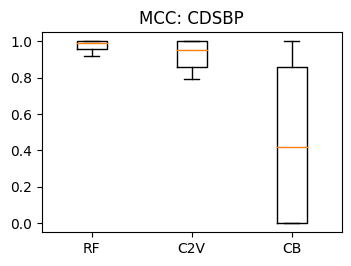

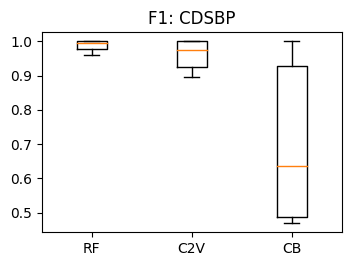

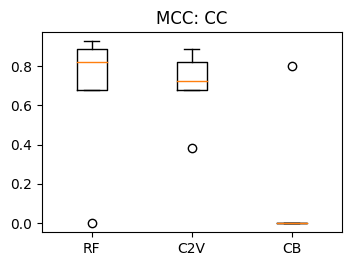

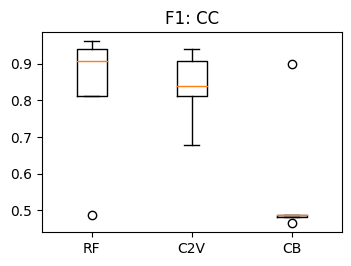

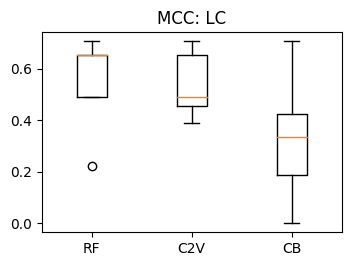

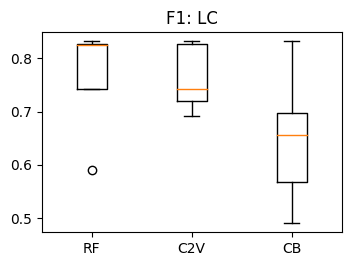

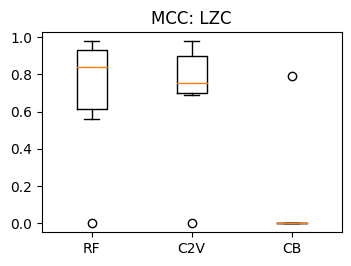

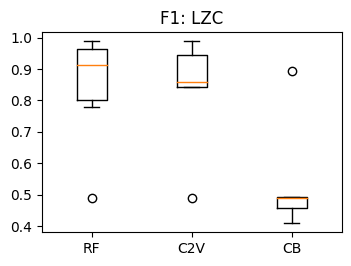

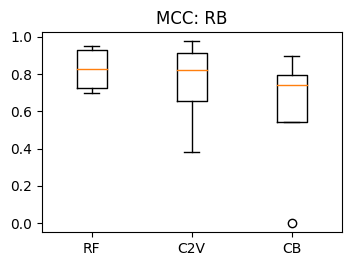

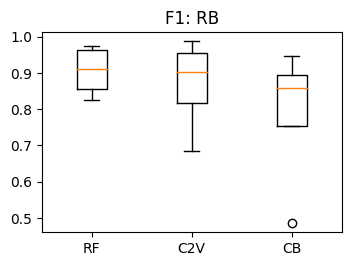

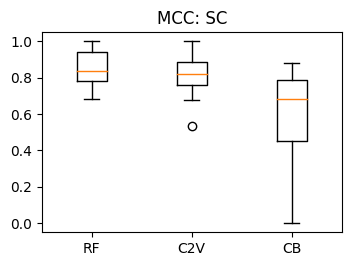

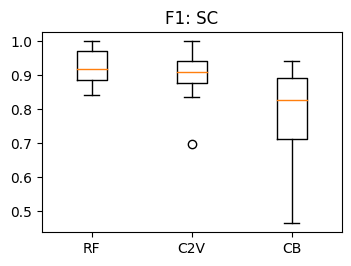

In [46]:
code_smells = ['CDSBP', 'CC', 'LC', 'LZC', 'RB', 'SC']

# Loop attraverso i code smell
for smell in code_smells:
    df_rf2 = df_RF[df_RF['Smell'] == smell]
    df_w2v2 = df_W2V[df_W2V['Smell'] == smell]
    df_cb2 = df_CB[df_CB['Smell'] == smell]

    if df_rf2.empty or df_w2v2.empty or df_cb2.empty:
        continue

    fig = plt.figure(figsize=(3, 2))
    data = [df_rf2['mcc'], df_w2v2['mcc'], df_cb2['mcc']]
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    # Creating plot
    bp = ax.boxplot(data)
    plt.title("MCC: " + smell)
    cls = ['RF', 'C2V', 'CB']
    plt.xticks(range(1, len(cls) + 1), cls)
    # show plot
    plt.show()

    # Creating plot
    fig2 = plt.figure(figsize=(3, 2))
    data2 = [df_rf2['f1'], df_w2v2['f1'], df_cb2['f1']]
    # Creating axes instance
    ax2 = fig2.add_axes([0, 0, 1, 1])

    # Creating plot
    bp2 = ax2.boxplot(data2)
    plt.title("F1: " + smell)
    cls2 = ['RF', 'C2V', 'CB']
    plt.xticks(range(1, len(cls2) + 1), cls2)
    # show plot
    plt.show()


In [47]:
df_rf2 = df_RF[df_RF['Smell'] == "CDSBP"]
df_w2v2 = df_W2V[df_W2V['Smell'] == "CDSBP"]
df_cb2 = df_CB[df_CB['Smell'] == "CDSBP"]

In [48]:
df_cb2

,Project_name,Smell,Y_pred,Y_test,precision,accuracy,recall,f1,mcc
0,ant-ivy-2.0.0-alpha2,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.470588,0.941176,0.500000,0.484848,0.000000
2,ant-rel-1.8.3,CDSBP,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,1.000000
7,cassandra-cassandra-1.0.0,CDSBP,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...",0.909091,0.822785,0.562500,0.561111,0.319801
11,elasticsearch-v0.19.0,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479358,0.958716,0.500000,0.489461,0.000000
18,hsqldb-2.2.8,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.952355,0.984791,0.952355,0.952355,0.904710
24,nutch-release-1.4,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.442308,0.884615,0.500000,0.469388,0.000000
26,pig-release-0.8.0,CDSBP,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.976190,0.953271,0.642857,0.710027,0.521641
30,xerces2-j-Xerces-J_2_3_0,CDSBP,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...",0.941853,0.934066,0.902778,0.919231,0.843727
